# Importing the Dataset

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')


In [71]:
df=pd.read_csv('Census.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [72]:
df.tail(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32541,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32542,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32543,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32544,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32545,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32546,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32547,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32548,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32549,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


We can see question mark in few columns.

# Exploratory Data Analysis

In [73]:
df.shape

(32560, 15)

# Checking Null Values

In [74]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in the dataset.

In [75]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# DataFrame Description

The datset contains the data of the details of the persons working in US above the age of 16 till 100.The prediction task is to determine whether a person makes over $50K a year.The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.A single cell estimate of the population 16+ for each state.Controls by Race, age and sex.

According to the given features we have predict wheather the person makes $50 per year  or not.

# Checking the datatypes of the columns

In [76]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [77]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

# Statistical Analysis

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


Mean of age is 38 , minimum age is 17 years and maximum is 90 years,so our dataset is spread over 17 to 90 years.
we can education number is minimum is 1 and maximum is 16.
so maximum hours per week is 99 and minimum hours per week is 1 hr.

so we are going deal with the question marks datas in the columns.

# Value Count Function

In [79]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [80]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

we have ? in the column which has 1836 data.we are going to fill this column.

In [81]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

we have ? in the column which has 2002 datas.we have 15 unique values for occupation.we have to fill this.

In [82]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [83]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [84]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [85]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [86]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

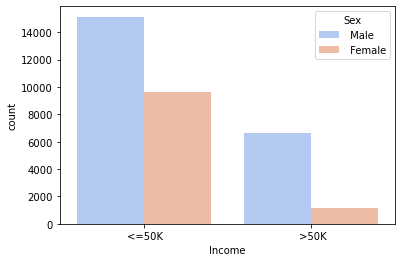

In [87]:
sns.countplot(df['Income'],palette='coolwarm',hue='Sex',data=df)

Male is having more income than females with >,<50k.

<AxesSubplot:xlabel='Income', ylabel='count'>

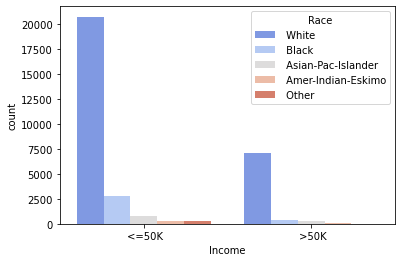

In [88]:
sns.countplot(df['Income'],palette='coolwarm',hue='Race',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

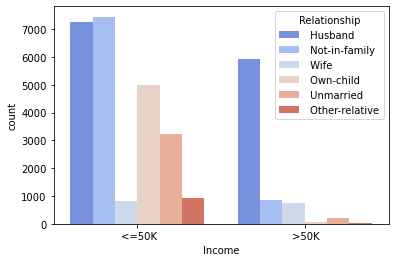

In [89]:
sns.countplot(df['Income'],palette='coolwarm',hue='Relationship',data=df)

In [90]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

we cansee that ,in not in family there are majority <=50k,who are in family with husband are>=50k.

# Filling ? mark values.

In [91]:
df['Workclass']=df['Workclass'].replace(' ?','Private')
df['Occupation']=df['Occupation'].replace(' ?','Prof-specialty')
df['Native_country']=df['Native_country'].replace(' ?','United-States')

In [92]:
df.tail(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32540,41,Private,202822,HS-grad,9,Separated,Prof-specialty,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32541,72,Private,129912,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,25,United-States,<=50K
32542,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32543,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32544,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32545,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32546,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32547,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32548,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32549,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


# Feature Engineering

In [93]:
#Education
df.Education=df.Education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th'],'school',regex=True)
df.Education=df.Education.replace('HS-grad','high school',regex=True)
df.Education=df.Education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher',regex=True)
df.Education=df.Education.replace('Bachelors','undergrad',regex=True)
df.Education=df.Education.replace('Masters','grad',regex=True)
df.Education=df.Education.replace('Doctorate','doc',regex=True)

In [94]:
df['Education'].value_counts()

 high school    10501
 higher         10316
 undergrad       5354
 school          2645
 grad            1723
 11th            1175
 12th             433
 doc              413
Name: Education, dtype: int64

In [95]:
#martial Status
df['Marital_status']=df['Marital_status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married',regex=True)
df['Marital_status']=df['Marital_status'].replace(['Never-married'],'not-married',regex=True)
df['Marital_status']=df['Marital_status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'other',regex=True)

In [96]:
df['Marital_status'].value_counts()

 married        14999
 not-married    10682
 other           6879
Name: Marital_status, dtype: int64

In [97]:
#Income
df.Income =df.Income.replace('<=50K',0,regex=True)
df.Income=df.Income.replace('>50K',1,regex=True)

In [98]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,undergrad,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,high school,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,undergrad,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,grad,14,married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [99]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,higher,12,married,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,high school,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,high school,9,other,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,high school,9,not-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32559,52,Self-emp-inc,287927,high school,9,married,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [100]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


by looking at the values we can see values are normally correlated.there is not much high positive correlation.

<AxesSubplot:>

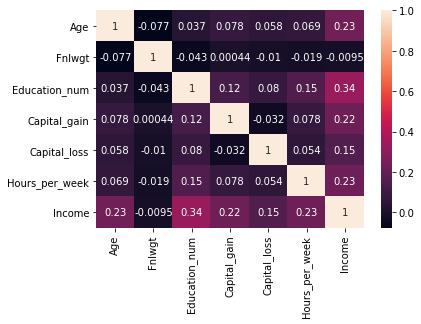

In [101]:
sns.heatmap(df.corr(),annot=True)

# Data Visualization

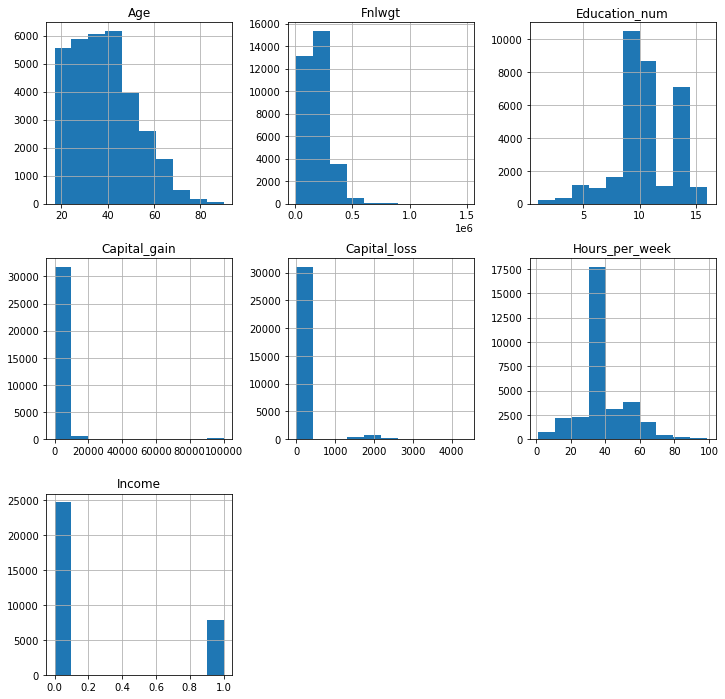

In [102]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False);

Age is spread from 17 to 90 years.most of the age group is 20 to 50.
capital gain,is 0 to 1000,1500,we have some outliers in capital loss.
In hours per week..we have maximum people working in 25 to 45 hrs per week.
people who have income more than 50k lies under 11000k..

Age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Education_num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Capital_gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Capital_loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Hours_per_week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Income                  AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

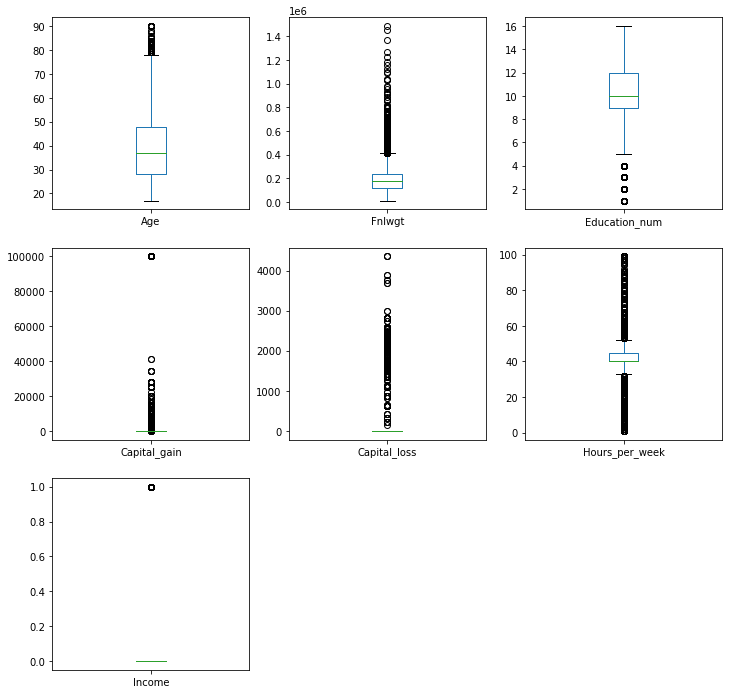

In [103]:
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True)

<AxesSubplot:xlabel='Race', ylabel='count'>

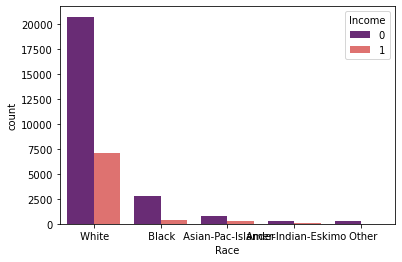

In [104]:
sns.countplot(df['Race'],hue='Income',data=df,palette='magma')

The white people has more income than any other race.

<AxesSubplot:xlabel='Education', ylabel='count'>

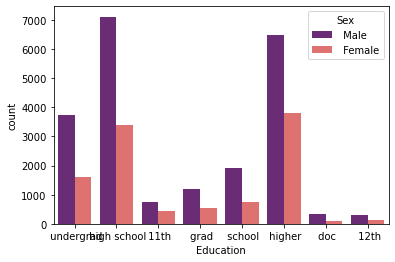

In [105]:
sns.countplot(df['Education'],hue='Sex',data=df,palette='magma')

Male has more education category,than females.

# Model Building

In [106]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [107]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [108]:
df=df.apply(LabelEncoder().fit_transform)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,7,12,0,3,0,4,1,0,0,12,38,0
1,21,3,14085,4,8,2,5,1,4,1,0,0,39,38,0
2,36,3,15335,0,6,0,5,0,2,1,0,0,39,38,0
3,11,3,19354,7,12,0,9,5,2,0,0,0,39,4,0
4,20,3,17699,3,13,0,3,5,4,0,0,0,39,38,0


In [109]:
ss=StandardScaler().fit(df.drop('Income',axis=1))

In [110]:
x=ss.transform(df.drop('Income',axis=1))
y=df['Income']

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

# Logistic Regression

In [113]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8383497133497133
[[6923  489]
 [1090 1266]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      7412
           1       0.72      0.54      0.62      2356

    accuracy                           0.84      9768
   macro avg       0.79      0.74      0.76      9768
weighted avg       0.83      0.84      0.83      9768



# Ensemble Techniques-Random Forest Classifier¶

In [114]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.861998361998362
[[6941  471]
 [ 877 1479]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7412
           1       0.76      0.63      0.69      2356

    accuracy                           0.86      9768
   macro avg       0.82      0.78      0.80      9768
weighted avg       0.86      0.86      0.86      9768



# Confusion Matrix

In [116]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rf.predict(x_test))
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(cm)
print('Model Testing Accuracy={}'.format((TP+TN)/(TP+TN+FN+FP)))

[[6941  471]
 [ 877 1479]]
Model Testing Accuracy=0.861998361998362


<AxesSubplot:>

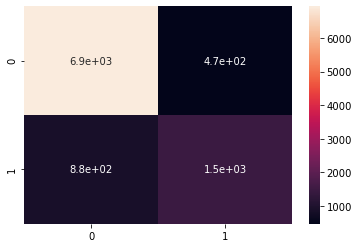

In [117]:
sns.heatmap(cm,annot=True)

In [118]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))


accuracy score:
0.8264742014742015
[[6887  525]
 [1170 1186]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7412
           1       0.69      0.50      0.58      2356

    accuracy                           0.83      9768
   macro avg       0.77      0.72      0.74      9768
weighted avg       0.82      0.83      0.82      9768



In [119]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8523751023751024
[[7031  381]
 [1061 1295]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7412
           1       0.77      0.55      0.64      2356

    accuracy                           0.85      9768
   macro avg       0.82      0.75      0.77      9768
weighted avg       0.85      0.85      0.84      9768



In [120]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8676289926289926
[[7004  408]
 [ 885 1471]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7412
           1       0.78      0.62      0.69      2356

    accuracy                           0.87      9768
   macro avg       0.84      0.78      0.81      9768
weighted avg       0.86      0.87      0.86      9768



# Cross Validation

In [121]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[0.84413391 0.84812654 0.85058354 0.85503686 0.85058354]
0.8496928746928747


In [122]:
score=cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())

[0.81772113 0.8203317  0.82954545 0.82217445 0.82386364]
0.8227272727272729


In [123]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.85472973 0.85012285 0.85672604 0.86210074 0.85964373]
0.8566646191646192


# Saving the model

In [130]:
import pickle

filename='census2.pkl'
pickle.dump(gnb,open(filename,'wb'))

#load the model from disk
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

# Conclusion

In [ ]:
 # precision    recall  f1-score   support

  #         0       0.89      0.94      0.92      7412
   #        1       0.78      0.62      0.69      2356


In [ ]:
#for class:1 (>50k)
#    precision is 0.89

# Hyper Parameter Tuning

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [132]:
from sklearn import svm, datasets

from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

clf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [133]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [134]:
sv=svm.SVC(kernel='poly',C=1)
sv.fit(x,y)
t=sv.score(x,y)
print(round(t,2))

0.85


In [135]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier()
iris=datasets.load_iris()

grid_param={'criterion':['gini','entropy']
           }

#gridk={'kernel':['linear','rbf','poly']}

gd_sr=GridSearchCV(estimator=dtc,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x_test,y_test)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.809991609370881


# # AUC ROC CURVE

In [136]:
from  sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [137]:
y_pred_prob=ad.predict_proba(x_test)[:,1]

In [138]:
y_pred_prob

array([0.48754234, 0.48690854, 0.49872113, ..., 0.49470962, 0.49102062,
       0.5045819 ])

In [139]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [140]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99865084, 0.99905559,
       1.        ])

In [141]:
tpr

array([0.00000000e+00, 4.24448217e-04, 1.69779287e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [142]:
thresholds

array([1.56483734, 0.56483734, 0.56402505, ..., 0.46487497, 0.46440688,
       0.43478666])

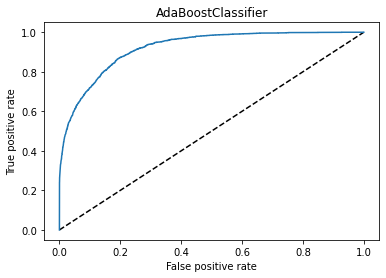

In [144]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()

In [145]:
auc_score=roc_auc_score(y_test,ad.predict(x_test))

In [146]:
print(auc_score)

0.7846587280571953
